### **References**
- [https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3](https://viblo.asia/p/linear-regression-hoi-quy-tuyen-tinh-trong-machine-learning-4P856akRlY3)
- [https://www.dathoangblog.com/2018/07/linear-regression-mot-bien.html](https://www.dathoangblog.com/2018/07/linear-regression-mot-bien.html)
- [https://www.wikihow.vn/T%C3%ADnh-%C4%90%E1%BB%99-l%E1%BB%87ch-Chu%E1%BA%A9n](https://www.wikihow.vn/T%C3%ADnh-%C4%90%E1%BB%99-l%E1%BB%87ch-Chu%E1%BA%A9n)
- [https://machinelearningcoban.com/2016/12/28/linearregression/](https://machinelearningcoban.com/2016/12/28/linearregression/)
- [https://www.youtube.com/watch?v=VmbA0pi2cRQ](https://www.youtube.com/watch?v=VmbA0pi2cRQ)
- [https://github.com/nadinejackson1/python-linear-regression-gradient-descent/blob/main/100DaysofML-Day6.ipynb](https://github.com/nadinejackson1/python-linear-regression-gradient-descent/blob/main/100DaysofML-Day6.ipynb)
- [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

### **Behind the scences**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

test_data = pd.read_csv('./dataset/test-data.csv')

##### Problem  
We have a data of the student study hours and the final score, then we want to predict the final score depends on the study hours follow the rules of the data. Example we have data show as a point in the chart below.

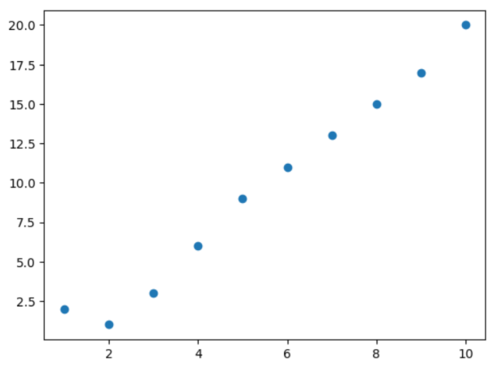

Let's say the y axis is the study hours and the x axis is the final score. By eye we can see the rules of the data point is the straight line like this

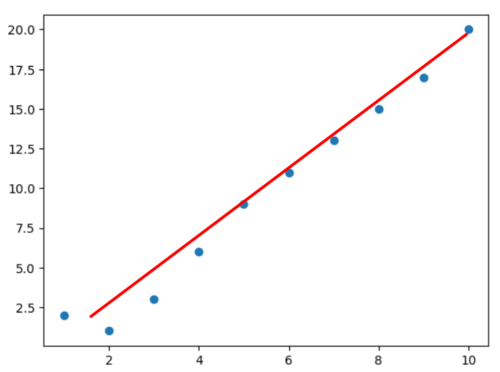

Then we can predict the student who study 5 hours will reach 3.3 score. But how do we the the line is the fit line? and how we told the machine to draw the line like that?

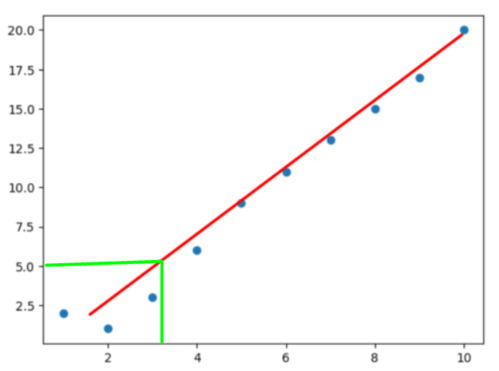

#### Solve the problem  
To draw the line we need at least 2 points, let's say we pick random 2 point of the data and draw the fitting line. We have the equation:
$$y=ax+b$$
Example with 2 points:
$$p_1(4,6)$$
$$p_2(5,9)$$
We can calculate the x, y by the simultaneous equation:
$$6=4a+b \textcolor{red}{\rArr} b=6-4a \textcolor{red}{\rArr} b=-6$$
$$9=5a+b \textcolor{red}{\rArr} 9=5a+6-4a \textcolor{red}{\rArr} 9=a+6 \textcolor{red}{\rArr} a=3$$
The equation is:
$$y=3x-6$$

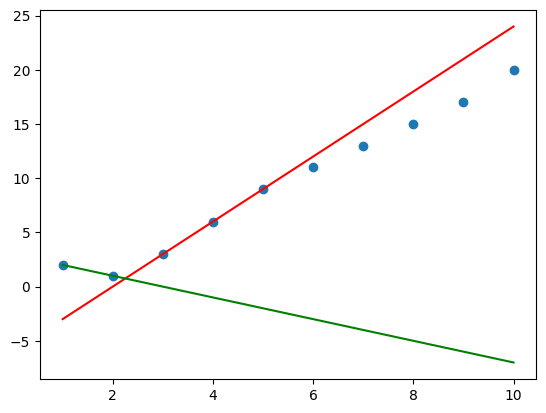

In [2]:
# select 2 random points
sample_data = test_data[['x']].copy()
sample_data['y'] = sample_data.apply(lambda row: 3 * row['x'] - 6, axis=1)

# solve simultaneous equation p1(1,2), p2(2,1)
# => 2 = a + b
# => 1 = 2a + b
A = [[1,1], [2,1]]
B = [2,1]
res = np.linalg.solve(A,B)
sample_data_1 = test_data[['x']].copy()
sample_data_1['y'] = sample_data_1.apply(lambda row: res[0] * row['x'] + res[1], axis=1)

plt.scatter(test_data['x'], test_data['y'])
plt.plot(sample_data['x'], sample_data['y'], c='red')
plt.plot(sample_data_1['x'], sample_data_1['y'], c='green')
plt.show()

As we can see, with those points p1(4,6), p2(5,9) the line (red) seem not fitting with the far points. And with 2 first points p1(1,2), p2(2,1) the line (green) even worst. Let's try to fit every cases

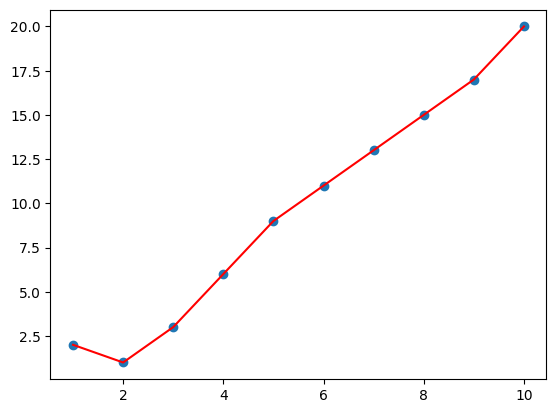

In [3]:
plt.scatter(test_data['x'], test_data['y'])
plt.plot(test_data['x'], test_data['y'], c='red')
plt.show()

The line will fit all the data, but in case we have new data, the prediction will not correct.
#### Try other way   
Let's initial the line with p(0,0)

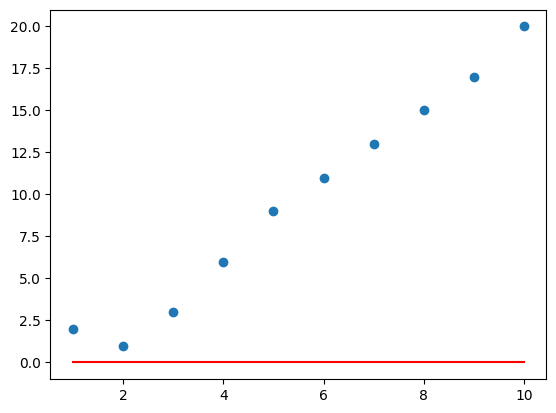

In [4]:
sample_data = test_data[['x']].copy()
sample_data['y'] = sample_data.apply(lambda row: 0 * row['x'] + 0, axis=1)

plt.scatter(test_data['x'], test_data['y'])
plt.plot(sample_data['x'], sample_data['y'], c='red')
plt.show()

Let try to increase a

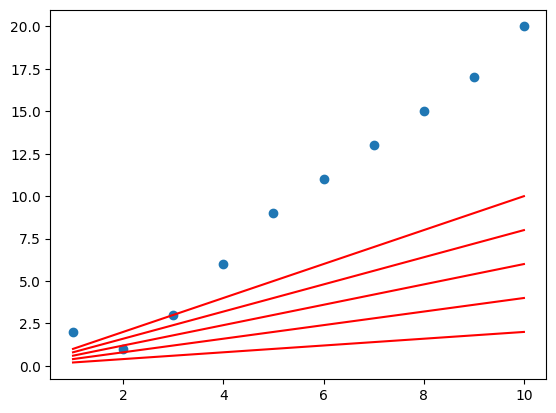

In [5]:
sample_data1 = test_data.copy()
plt.scatter(test_data['x'], test_data['y'])
for i in range(1,6):
    sample_data1[f'y (a={i/5})'] = sample_data1.apply(lambda row: (i/5) * row['x'] + 0, axis=1)
    plt.plot(sample_data1['x'], sample_data1[f'y (a={i/5})'], c='red')

plt.show()

In the chart above we increase a by 0.2:
- `y = 0.2x + 0`
- `y = 0.4x + 0`
- `y = 0.6x + 0`
- `y = 0.8x + 0`
- `y = x + 0`  

As we can see, the slope of the line increased. Let try to increase b

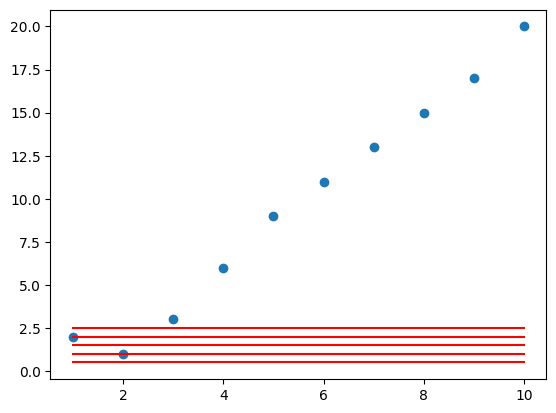

In [6]:
sample_data2 = test_data.copy()
plt.scatter(test_data['x'], test_data['y'])
for i in range(1,6):
    sample_data2[f'y (b={i/2})'] = sample_data2.apply(lambda row: 0 * row['x'] + (i/2), axis=1)
    plt.plot(sample_data2['x'], sample_data2[f'y (b={i/2})'], c='red')

plt.show()

We increase b by 0.5:
- `y = 0x + 0.5`
- `y = 0x + 1`
- `y = 0x + 1.5`
- `y = 0x + 2`
- `y = 0x + 2.5`  

Now the line moving. Summarize we can try to change a and b over and over again to check the line fit with the data point. But how to let the machine know that, as human we can see it, but when the alpha increase very small like 0.001 we also don't know which one better.

Let's checkout the data sample_data1, which one we increase the a cuz the line change much more than b

In [7]:
print(sample_data1)

    x   y  y (a=0.2)  y (a=0.4)  y (a=0.6)  y (a=0.8)  y (a=1.0)
0   1   2        0.2        0.4        0.6        0.8        1.0
1   2   1        0.4        0.8        1.2        1.6        2.0
2   3   3        0.6        1.2        1.8        2.4        3.0
3   4   6        0.8        1.6        2.4        3.2        4.0
4   5   9        1.0        2.0        3.0        4.0        5.0
5   6  11        1.2        2.4        3.6        4.8        6.0
6   7  13        1.4        2.8        4.2        5.6        7.0
7   8  15        1.6        3.2        4.8        6.4        8.0
8   9  17        1.8        3.6        5.4        7.2        9.0
9  10  20        2.0        4.0        6.0        8.0       10.0


As we can see the line `y = x + 0` is the best fit of 5. Let try to proof it by math:  
Different between predict and actual can calculate by:  
$$err=\widehat{y}-y$$
$\widehat{y}$: y actual  
$y$: y predict  

Sometime the value will be negative, so we use square here:  
$$err=(\widehat{y}-y)^2$$
Now we have the error value of 1 point, to calculate average:
$$err=\frac{\sum_{i=1}^{n}\left(y_{i}-\widehat{y_{i}}\right)^2}{n}=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\widehat{y_{i}}\right)^2$$

In [8]:
for i in range(1,6):
    x = lambda row: (row['y']  - row[f'y (a={i/5})']) ** 2
    sample_data1[f'err (a={i/5})'] = sample_data1.apply(lambda row: (row['y']  - row[f'y (a={i/5})']) ** 2, axis=1)
    print(f'error y (a={i/5}):', x(sample_data1).mean())

error y (a=0.2): 106.55999999999999
error y (a=0.4): 82.7
error y (a=0.6): 61.92
error y (a=0.8): 44.22
error y (a=1.0): 29.6


The line `y = x + 0` have the smallest error value, which is correct with what we saw in the chart, the line closest with our expect. Now with the formula to calculate the error, we can easy to set up a loop to try every single value then pick the smallest error. It is a fitting line

In [94]:
initialValueA = 0
initialValueB = 0
step = 0.01
y = lambda a, b, row: a * row['x'] + b
z = lambda row, yData: (row['y']  - yData) ** 2

min_err = None
min_a = None
min_b = None

for i in range(0,35):
    for j in range (0,35):
        y_predict = y(initialValueA, initialValueB, sample_data1)
        error_avg = z(sample_data1, y_predict).mean()

        if min_err == None or min_err > error_avg:
            min_err = error_avg
            min_a = initialValueA
            min_b = initialValueB

        initialValueA += step
    initialValueB += step

print('min a:', min_a)
print('min b:', min_b)
print('min err:', min_err)

min a: 1.8400000000000014
min b: 0.05
min err: 1.8740999999999997


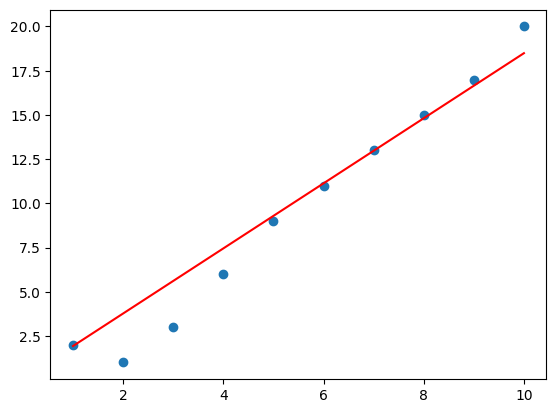

In [10]:
a = 1.84
b = 0.09
y = lambda row: a * row['x'] + b

plt.scatter(test_data['x'], test_data['y'])
plt.plot(sample_data1['x'], y(sample_data1), c='red')
plt.show()

But it still not a perfect line, in the example code I loop 20 times of each a and b with stepness is 0,01. If we change increase the loop 30, 49 times the result will better, also we can decrease the stepness too.

The problem now is with real life data, there are a bunch of data point with massive value, we need to loop a lot to find a accepted value. Let check the relation of x, y and error in 3d graph

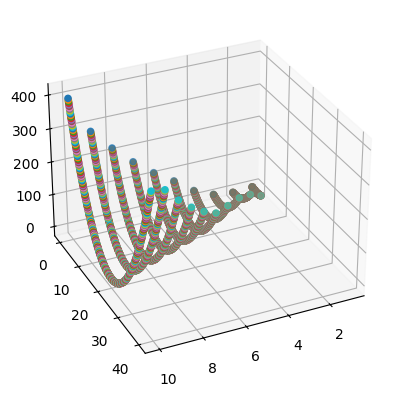

In [11]:
initialValueA = 0
initialValueB = 0
step = 0.01
fig = plt.figure()
ax = plt.axes(projection='3d')
y = lambda a, b, row: a * row['x'] + b
z = lambda row, yData: (row['y']  - yData) ** 2
for i in range(0,20):
    for j in range (0,20):
        temp = y(initialValueA, initialValueB, sample_data1)
        ax.scatter3D(sample_data1['x'], temp, z(sample_data1, temp))
        initialValueA += step
    initialValueB += step
ax.view_init(30, 65)

As we can see the error function display as a parabol, will reach the extreme when the y_predict close to y. Let deep down into a error function at 1 point, use the a and b we founded from the loop above

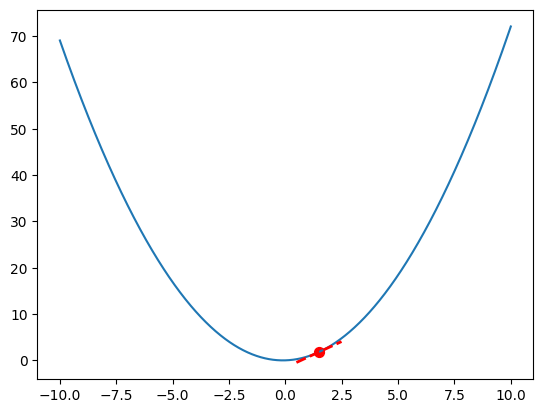

In [12]:
import random
x = np.linspace(-10, 10, 1000)
y = (x - (1.84 * x + 0.09)) ** 2

plt.figure()
plt.plot(x, y)

point = random.randint(0, 1000)
plt.scatter(x[point], y[point], color='r', s=50)

# Define parabola derivative
def slope(x): 
    return 2*(x-(1.84*x+0.09))*(1-1.84)
# Define tangent line
# y = m*(x - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

xrange = np.linspace(x[point] - 1, x[point] + 1, 20)
plt.plot(xrange, line(xrange, x[point], y[point]), 'r--', linewidth = 2)

Each point in the error function can draw a tangent which is interact with error function a slope value. When the point reach to the extreme point the slope is 0. Base on that we can use the derivative of the error function of each point to calculate the stepness for our case. The concept is:
- From the left side (-10, 0) the slope is < 0 cuz the tangent going down => we should add slope value to our stepness
- From the right side (-10, 0) the slope is > 0 cuz the tangent going up => we should minus slope value to our stepness

Calculate derivative:  
To simple it, when calculate the append value of a, we assume the the slope of b at 0 (b = 0) and vice versa

**a derivative**  
$$E=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\widehat{y_{i}}\right)^2$$
With $b=0$
$$\frac{dE}{da}=\frac{1}{n}\sum_{i=0}^{n}2.(y_{i}-\widehat{y_{i}}).(y_{i}-\widehat{y_{i}})'=\frac{1}{n}\sum_{i=0}^{n}2.(y_{i}-(ax_{i}+b)).(y_{i}-(ax_{i}+b))'=-\frac{2}{n}\sum_{i=0}^{n}x_{i}.(y_{i}-(ax_{i}+b))$$
**b derivative**  

With $a=0$
$$\frac{dE}{db}=-\frac{2}{n}\sum_{i=0}^{n}(y_{i}-(ax_{i}+b))$$

-1.0 1.0
1.0 1.0
-1.0 1.0
1.0 1.0


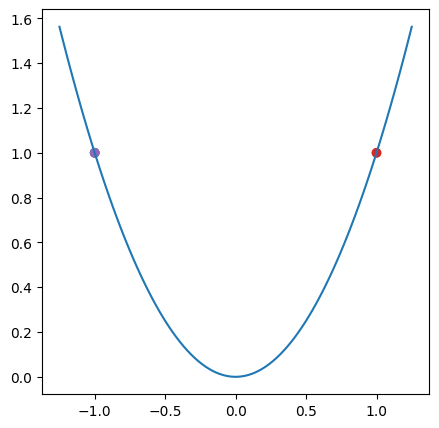

In [13]:
x = np.linspace(-1.25, 1.25, 100)
y = x ** 2  # parabola

n = len(x)  # sample points
iter = 0  # first iteration
itersteps = 5  # total iterations

# Initial guess for x and vectors to keep track of certain values
xx = np.ones(itersteps) * -1
yy = np.zeros(itersteps)
E = np.zeros(itersteps)
dEdx = np.zeros(itersteps)

a = 1  # learning rate

for i in range(1,5):
    E[iter] = xx[iter] ** 2  # Original function y=x^2
 
    dEdx[iter] = 2 * xx[iter]  # Derivative of function y=x^2
 
    yy[iter] = xx[iter] ** 2  # Value of y at the current xx for y=x^2
 
    print(xx[iter], yy[iter])
    xx[iter + 1] = xx[iter] - a * dEdx[iter]  # New xx value
    iter += 1

fig, ax, = plt.subplots(figsize=(5, 5))
ax.plot(x, y)
dot = ax.scatter(xx, xx ** 2, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], marker="o") # scatter iter points
plt.show()

As we can see, if we only add slope value to the stepness, the point will switch between 2 place (axis above). We need to change the learning rate to allow the point move forward  

$$a=L.\frac{dE}{da}$$  
$$b=L.\frac{dE}{db}$$  

Now we have 2 way, increase or decrease. Let's check it out

-1.0 1.0
1.02 1.0404
-1.0404 1.08243216
1.0612080000000002 1.1261624192640003


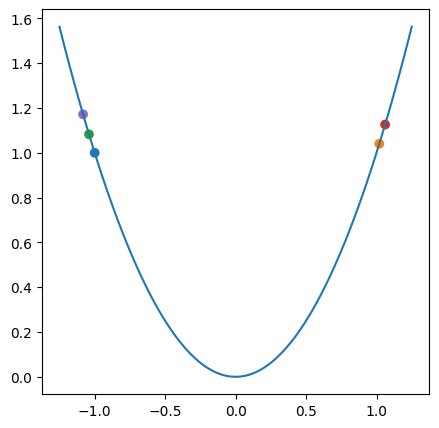

In [14]:
x = np.linspace(-1.25, 1.25, 100)
y = x ** 2  # parabola

n = len(x)  # sample points
iter = 0  # first iteration
itersteps = 5  # total iterations

# Initial guess for x and vectors to keep track of certain values
xx = np.ones(itersteps) * -1
yy = np.zeros(itersteps)
E = np.zeros(itersteps)
dEdx = np.zeros(itersteps)

a = 1.01  # learning rate

for i in range(1,5):
    E[iter] = xx[iter] ** 2  # Original function y=x^2
 
    dEdx[iter] = 2 * xx[iter]  # Derivative of function y=x^2
 
    yy[iter] = xx[iter] ** 2  # Value of y at the current xx for y=x^2
 
    print(xx[iter], yy[iter])
    xx[iter + 1] = xx[iter] - a * dEdx[iter]  # New xx value
    iter += 1

fig, ax, = plt.subplots(figsize=(5, 5))
ax.plot(x, y)
dot = ax.scatter(xx, xx ** 2, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], marker="o") # scatter iter points
plt.show()

The point moving up, seem like we should decrease the rate

-1.0 1.0
-0.8 0.6400000000000001
-0.64 0.4096
-0.512 0.262144


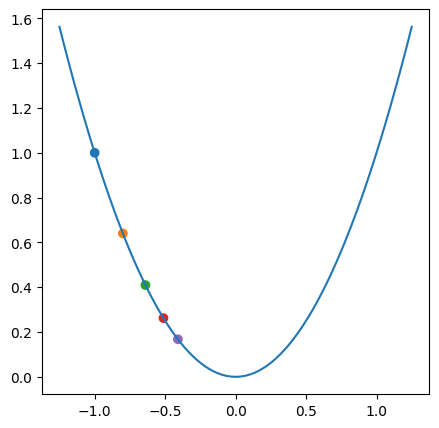

In [67]:
x = np.linspace(-1.25, 1.25, 100)
y = x ** 2  # parabola

n = len(x)  # sample points
iter = 0  # first iteration
itersteps = 5  # total iterations

# Initial guess for x and vectors to keep track of certain values
xx = np.ones(itersteps) * -1
yy = np.zeros(itersteps)
E = np.zeros(itersteps)
dEdx = np.zeros(itersteps)

a = 0.1  # learning rate
# a = 0.01  # learning rate

for i in range(1,5):
    E[iter] = xx[iter] ** 2  # Original function y=x^2
 
    dEdx[iter] = 2 * xx[iter]  # Derivative of function y=x^2
 
    yy[iter] = xx[iter] ** 2  # Value of y at the current xx for y=x^2
 
    print(xx[iter], yy[iter])
    xx[iter + 1] = xx[iter] - a * dEdx[iter]  # New xx value
    iter += 1

fig, ax, = plt.subplots(figsize=(5, 5))
ax.plot(x, y)
dot = ax.scatter(xx, xx ** 2, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], marker="o") # scatter iter points
plt.show()

Now the point moving correct way, view in the axis, the point moving slow down to the extreme point. When we decrease the learning rate to 0.01 the speed kinda smooth. The goal of machine learning is select the optimal learning rate.

Now we have all we need, let re-do the algorithms again

In [56]:
print(sample_data1)

    x   y  y (a=0.2)  y (a=0.4)  y (a=0.6)  y (a=0.8)  y (a=1.0)  err (a=0.2)  \
0   1   2        0.2        0.4        0.6        0.8        1.0         3.24   
1   2   1        0.4        0.8        1.2        1.6        2.0         0.36   
2   3   3        0.6        1.2        1.8        2.4        3.0         5.76   
3   4   6        0.8        1.6        2.4        3.2        4.0        27.04   
4   5   9        1.0        2.0        3.0        4.0        5.0        64.00   
5   6  11        1.2        2.4        3.6        4.8        6.0        96.04   
6   7  13        1.4        2.8        4.2        5.6        7.0       134.56   
7   8  15        1.6        3.2        4.8        6.4        8.0       179.56   
8   9  17        1.8        3.6        5.4        7.2        9.0       231.04   
9  10  20        2.0        4.0        6.0        8.0       10.0       324.00   

   err (a=0.4)  err (a=0.6)  err (a=0.8)  err (a=1.0)  
0         2.56         1.96         1.44          1.

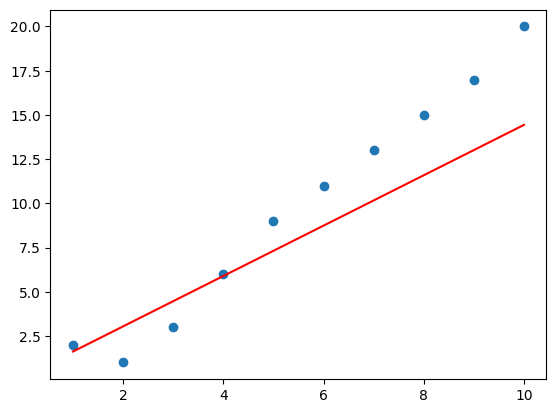

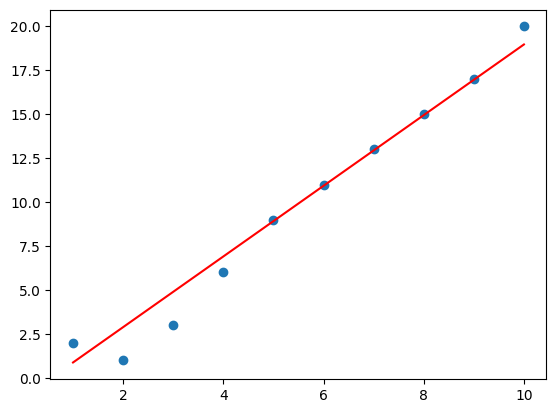

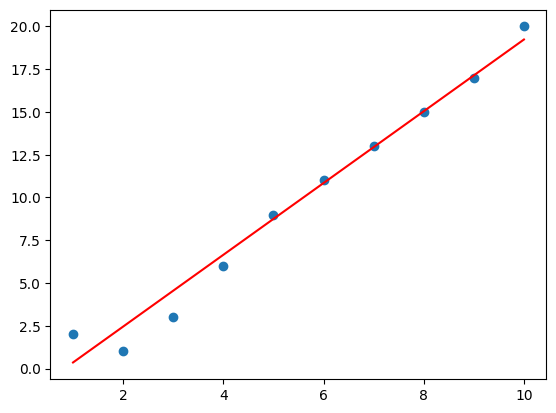

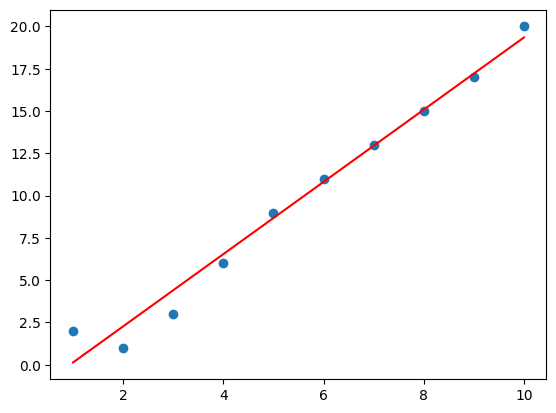

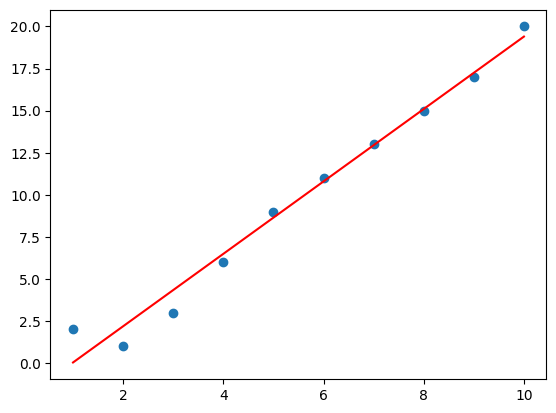

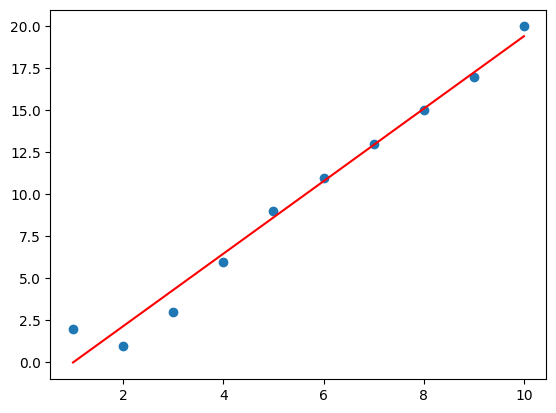

min err:  [2.1583595980647363, -2.163264095407314, 0.7893801252681516]


In [93]:
initialValueA = 0
initialValueB = 0

scatters = []
data = []
n = len(sample_data1['x'])
learning_rate = 0.01

y = lambda a, b, row: a * row['x'] + b
err = lambda row, yData: (row['y']  - yData) ** 2
a = lambda row, yData: row['x'] * (row['y'] - yData)
b = lambda row, yData: row['y'] - yData

min_err = None
min_a = None
min_b = None

def loss_func(a, b):
    total_err = 0
    for i in range(n):
        total_err += (sample_data1['y'][i] - (a * sample_data1['x'][i] + b)) ** 2
    return total_err/float(n)

def gradient_decent(a, b, L):
    a_gradient = 0
    b_gradient = 0
    for i in range(n):
        a_gradient += -(2/n) * sample_data1['x'][i] * (sample_data1['y'][i] - (a * sample_data1['x'][i] + b))
        b_gradient += -(2/n) * (sample_data1['y'][i] - (a * sample_data1['x'][i] + b))
    return a_gradient * L, b_gradient * L


for i in range(1000):
    # print(y(initialValueA, initialValueB, sample_data1))
    scatters.append(y(initialValueA, initialValueB, sample_data1))
    err_val = loss_func(initialValueA, initialValueB)
    data.append([initialValueA, initialValueB, err_val])

    a_gradient, b_gradient = gradient_decent(initialValueA, initialValueB, learning_rate)
    # print(a_gradient, b_gradient)

    initialValueA -= a_gradient
    initialValueB -= b_gradient
    # print(sample_data1['y'][i])

    if i%200==0 or i==999:
        plt.figure()
        plt.scatter(sample_data1['x'], sample_data1['y'])
        plt.plot(sample_data1['x'], y(initialValueA, initialValueB, sample_data1), c='r')
        # Show/save figure as desired.
        plt.show()

print('min err: ', data[999])

After 1000 times loop of gradient descent we founded the MSE = 0.7893801252681516, better than 35x35 times loop with simple for loop, even the MSE better than 1.8740999999999997

### **Example**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m

test_data = pd.DataFrame({'x': [1,2,3,4,5,6,7,8,9,10], 'y': [2,1,3,6,9,11,13,15,17,20]})
print(test_data)

    x   y
0   1   2
1   2   1
2   3   3
3   4   6
4   5   9
5   6  11
6   7  13
7   8  15
8   9  17
9  10  20


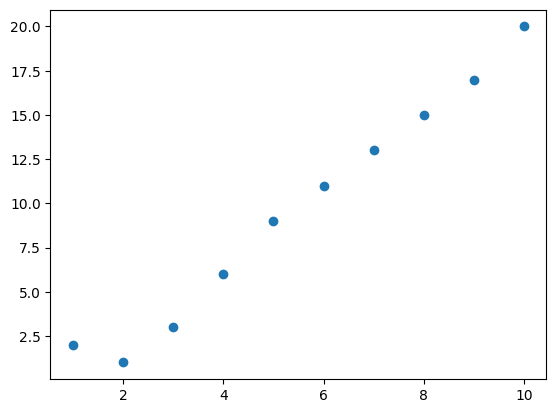

In [18]:
plt.scatter(test_data['x'], test_data['y'])
plt.show()

Linear Regression 1 parameter, linear equations: $$y=w_0+w_1x$$
- *w0: intercept*
- *w1: coefficient*

Multiple params: $$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

x, y is the input from test_data. Now need to find a, b to fit the dot chart on above, formula to calculate standard deviation: $$s=\sqrt{\frac{\sum\left(x_{i}-\overline{x}\right)^2}{n-1}}$$

In [19]:
n = len(test_data)
print('n:', n)

n: 10


In [20]:
x_mean = test_data['x'].mean()
print('x_mean:', x_mean)

x_mean: 5.5


In [21]:
y_mean = test_data['y'].mean()
print('y_mean:', y_mean)

y_mean: 9.7


Calculate standard deviation of x:

In [22]:
test_data["x_ps"] = test_data.apply(lambda row: (row['x'] - x_mean) ** 2, axis=1)
print(test_data)
x_variance = test_data['x_ps'].sum()/(n-1)
print('x_variance:', x_variance)

    x   y   x_ps
0   1   2  20.25
1   2   1  12.25
2   3   3   6.25
3   4   6   2.25
4   5   9   0.25
5   6  11   0.25
6   7  13   2.25
7   8  15   6.25
8   9  17  12.25
9  10  20  20.25
x_variance: 9.166666666666666


In [23]:
x_standard_deviation = m.sqrt(x_variance)
print(x_standard_deviation)

3.0276503540974917


Calculate standard deviation of y:

In [24]:
test_data["y_ps"] = test_data.apply(lambda row: (row['y'] - y_mean) ** 2, axis=1)
y_variance = test_data['y_ps'].sum()/(n-1)
y_standard_deviation = m.sqrt(y_variance)
print('y_standard_deviation:', y_standard_deviation)

y_standard_deviation: 6.61731734835869


Correlation coefficient formula: $$p_{xy}=\frac{Cov\left(x,y\right)}{\sigma_{x}\sigma_{y}}$$
Covariance formula: $$Cov_{xy}=\frac{\sum\left(x_{i}-\overline{x}\right)\left(y_{i}-\overline{y}\right)}{n-1}$$
Calculate correlation coefficient:

In [25]:
test_data["cov"] = test_data.apply(lambda row: (row['x'] - x_mean) * (row['y'] - y_mean), axis=1)
print(test_data)
cov = test_data['cov'].sum()/(n-1)
print('cov:', cov)

    x   y   x_ps    y_ps    cov
0   1   2  20.25   59.29  34.65
1   2   1  12.25   75.69  30.45
2   3   3   6.25   44.89  16.75
3   4   6   2.25   13.69   5.55
4   5   9   0.25    0.49   0.35
5   6  11   0.25    1.69   0.65
6   7  13   2.25   10.89   4.95
7   8  15   6.25   28.09  13.25
8   9  17  12.25   53.29  25.55
9  10  20  20.25  106.09  46.35
cov: 19.833333333333332


In [26]:
corr = cov/(x_standard_deviation*y_standard_deviation)
print(corr)

0.989938075756128


| | |
|--|--|
| x_standard_deviation | 3.0276503540974917 |
| y_standard_deviation | 6.61731734835869 |
| x_mean | 5.5 |
| y_mean | 9.7 |
| correlation_coefficient | 0.989938075756128 |


Calculate coefficient:

In [27]:
a = round(corr * (y_standard_deviation/x_standard_deviation), 3)
print('coefficient:', a)

coefficient: 2.164


Calculate intercept:

In [28]:
b = round(y_mean - a * x_mean, 3)
print('intercept', b)

intercept -2.202


=> Regression equations: $$y=2.164x-2.202$$

In [29]:
test_data['y_predict'] = test_data.apply(lambda row: a * row['x'] + b, axis=1)
print(test_data)

    x   y   x_ps    y_ps    cov  y_predict
0   1   2  20.25   59.29  34.65     -0.038
1   2   1  12.25   75.69  30.45      2.126
2   3   3   6.25   44.89  16.75      4.290
3   4   6   2.25   13.69   5.55      6.454
4   5   9   0.25    0.49   0.35      8.618
5   6  11   0.25    1.69   0.65     10.782
6   7  13   2.25   10.89   4.95     12.946
7   8  15   6.25   28.09  13.25     15.110
8   9  17  12.25   53.29  25.55     17.274
9  10  20  20.25  106.09  46.35     19.438


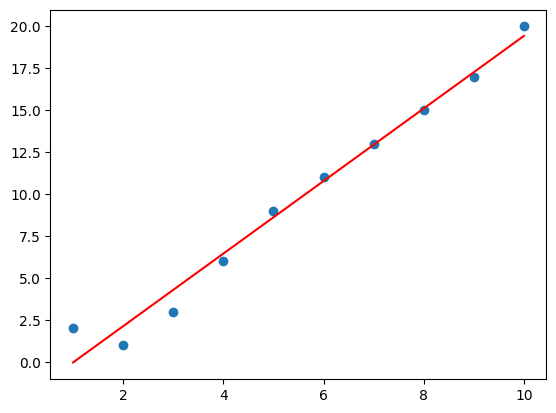

In [30]:
plt.scatter(test_data['x'], test_data['y'])
plt.plot(test_data['x'], test_data['y_predict'], color='red') # the fitting line
plt.show()

### **Evaluate model**

Mean Squared Error (MSE): $$MSE=\frac{1}{n}\cdot\sum^{}\left(y_{i}-y_{i}^{\prime}\right)^2$$
Calculate MSE:

In [31]:
test_data['y_mse'] = test_data.apply(lambda row: (row['y'] - row['y_predict']) ** 2, axis=1)
print(test_data)
mse = (1/n)*(test_data['y_mse'].sum())
print('mse:', mse)

    x   y   x_ps    y_ps    cov  y_predict     y_mse
0   1   2  20.25   59.29  34.65     -0.038  4.153444
1   2   1  12.25   75.69  30.45      2.126  1.267876
2   3   3   6.25   44.89  16.75      4.290  1.664100
3   4   6   2.25   13.69   5.55      6.454  0.206116
4   5   9   0.25    0.49   0.35      8.618  0.145924
5   6  11   0.25    1.69   0.65     10.782  0.047524
6   7  13   2.25   10.89   4.95     12.946  0.002916
7   8  15   6.25   28.09  13.25     15.110  0.012100
8   9  17  12.25   53.29  25.55     17.274  0.075076
9  10  20  20.25  106.09  46.35     19.438  0.315844
mse: 0.789092


Mean Absolute Error (MAE): $$MAE=\frac{\sum^{}\left|y_{i}^{\prime}-y_{i}\right|}{n}$$
Calculate MAE:

In [32]:
test_data['y_mae'] = test_data.apply(lambda row: abs(row['y_predict'] - row['y']), axis=1)
print(test_data)
mae = test_data['y_mae'].sum()/n
print('mae:', mae)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562
mae: 0.6507999999999997


Root Mean Square Error (RMSE): $$RMSE=\sqrt{\frac{\sum\left(y_{i}-y_{i}^{\prime}\right)^2}{n}}$$

In [33]:
test_data['y_rmse'] = test_data.apply(lambda row: (row['y'] - row['y_predict']) ** 2, axis=1)
print(test_data)
rmse = m.sqrt(test_data['y_rmse'].sum()/n)
print('rmse:', rmse)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae    y_rmse
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038  4.153444
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126  1.267876
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290  1.664100
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454  0.206116
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382  0.145924
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218  0.047524
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054  0.002916
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110  0.012100
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274  0.075076
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562  0.315844
rmse: 0.8883085049688536


In [34]:
from sklearn.metrics import root_mean_squared_error as sk_rmse, mean_squared_error as sk_mse, mean_absolute_error as sk_mae
print(sk_mse(test_data['y'], test_data['y_predict']))
print(sk_mae(test_data['y'], test_data['y_predict']))
print(sk_rmse(test_data['y'], test_data['y_predict']))

0.7890919999999999
0.6507999999999997
0.8883085049688536


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_data[['x']], test_data['y'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
print('intercept_:', lr.intercept_)
print('coef_:', lr.coef_)

intercept_: -1.7413793103448292
coef_: [2.11206897]


In [37]:
test_data['y_predict_sklearn'] = test_data.apply(lambda row: lr.coef_[0] * row['x'] + lr.intercept_, axis=1)
print(test_data)

    x   y   x_ps    y_ps    cov  y_predict     y_mse  y_mae    y_rmse  \
0   1   2  20.25   59.29  34.65     -0.038  4.153444  2.038  4.153444   
1   2   1  12.25   75.69  30.45      2.126  1.267876  1.126  1.267876   
2   3   3   6.25   44.89  16.75      4.290  1.664100  1.290  1.664100   
3   4   6   2.25   13.69   5.55      6.454  0.206116  0.454  0.206116   
4   5   9   0.25    0.49   0.35      8.618  0.145924  0.382  0.145924   
5   6  11   0.25    1.69   0.65     10.782  0.047524  0.218  0.047524   
6   7  13   2.25   10.89   4.95     12.946  0.002916  0.054  0.002916   
7   8  15   6.25   28.09  13.25     15.110  0.012100  0.110  0.012100   
8   9  17  12.25   53.29  25.55     17.274  0.075076  0.274  0.075076   
9  10  20  20.25  106.09  46.35     19.438  0.315844  0.562  0.315844   

   y_predict_sklearn  
0           0.370690  
1           2.482759  
2           4.594828  
3           6.706897  
4           8.818966  
5          10.931034  
6          13.043103  
7          1

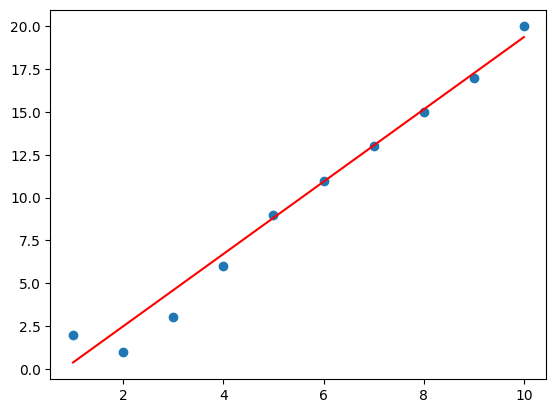

In [38]:
plt.scatter(test_data['x'], test_data['y'])
plt.plot(test_data['x'], test_data['y_predict_sklearn'], color='red') # the fitting line
plt.show()

In [39]:
y_pred = lr.predict(X_test)
compare_data = pd.DataFrame({ 'x': X_test['x'], 'y': y_test, 'y_predict': y_pred })
print(compare_data)

   x   y  y_predict
8  9  17  17.267241
1  2   1   2.482759


In [40]:
accuracy = lr.score(X_test, y_test)
print('accuracy:', accuracy)

accuracy: 0.982265694671522


### **Using matrices**

In [41]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# height (cm)
height = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
weight = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# test
height_test = np.array([[155, 160]])
weight_test = np.array([[52, 56]])

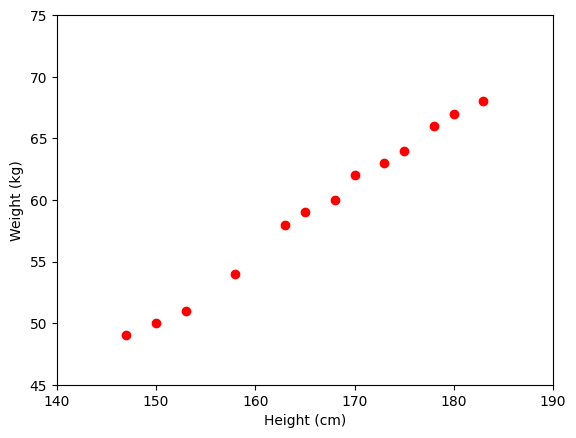

In [43]:
# Visualize data 
plt.plot(height, weight, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [44]:
# Building xBar 
one = np.ones((height.shape[0], 1))
xBar = np.concatenate((one, height), axis = 1)
print(xBar)

[[  1. 147.]
 [  1. 150.]
 [  1. 153.]
 [  1. 158.]
 [  1. 163.]
 [  1. 165.]
 [  1. 168.]
 [  1. 170.]
 [  1. 173.]
 [  1. 175.]
 [  1. 178.]
 [  1. 180.]
 [  1. 183.]]


In [45]:
print(xBar.T)
print(weight)

[[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [147. 150. 153. 158. 163. 165. 168. 170. 173. 175. 178. 180. 183.]]
[[49]
 [50]
 [51]
 [54]
 [58]
 [59]
 [60]
 [62]
 [63]
 [64]
 [66]
 [67]
 [68]]


In [46]:
# Calculating weights of the fitting line 
A = np.dot(xBar.T, xBar)
b = np.dot(xBar.T, weight)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[-33.73541021]
 [  0.55920496]]


In [47]:
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

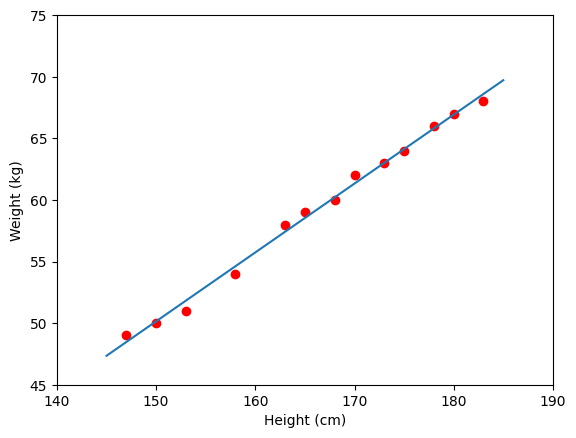

In [48]:
# Drawing the fitting line 
plt.plot(height.T, weight.T, 'ro')     # data 
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [49]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print( u'Predict weight of person with height 155 cm: %.2f (kg), real number: 52 (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg), real number: 56 (kg)'  %(y2) )

Predict weight of person with height 155 cm: 52.94 (kg), real number: 52 (kg)
Predict weight of person with height 160 cm: 55.74 (kg), real number: 56 (kg)


### **Sklearn library**

In [50]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(xBar, weight)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print( 'Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


### **Test manual loop to find fitting line**

In [51]:
import pandas as pd
data = pd.read_csv('./dataset/height_weight.csv')
data = data.iloc[0:4]
print(data)

FileNotFoundError: [Errno 2] No such file or directory: './dataset/height_weight.csv'

In [ ]:
plt.scatter(data.height, data. weight)
plt.show()

: 

### $$y=mx+b$$
Set m = 0, b = 0

In [ ]:
m = 0
# m = 0.25
b = 0
# b = 12
data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
loss = data['loss'].sum()
print(data)
print(loss)

: 

In [ ]:
# Calculate m, b
linear_data = pd.DataFrame({'m': [], 'b': [], 'loss': []})
for j in range(10):
    m += 0.25
    b = 0
    data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
    data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
    loss = data['loss'].sum()
    for i in range(100):
        b += 1
        data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
        data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
        loss_temp = data['loss'].sum()
        print(loss_temp, loss)
        if (loss_temp < loss):
            loss = loss_temp
        else:
            linear_data.loc[len(linear_data.index)] = [m, b, loss]
            break

: 

In [ ]:
print(linear_data)

: 

=> b = 14
=> m = 0.25

In [ ]:
b = 14
m = 0.25
data["predicted_weight"] = data.apply(lambda row: row['height'] * m + b, axis=1)
data["loss"] = data.apply(lambda row: (row['weight'] - row['predicted_weight']) ** 2, axis=1)
print(data)

: 

In [ ]:
plt.scatter(data.height, data.weight)
plt.plot(data['height'], data['predicted_weight'], color='red') # the fitting line
plt.axis([145, 160, 45, 55])
plt.show()

: 